In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Crop_Data.csv')

In [3]:
df.shape

(214471, 25)

In [4]:
df.head()

,State,District,Lat,Long,GW_depth_Min,GW_depth_Max,Wells_depth_0_to_2,Wells_depth_2_to_5,Wells_depth_5_to_10,Wells_depth_10_to_20,...,Humidity,Temp_Max,Temp_Min,Dew_Frost_Point,Wind_Speed,Year,Season,Crop,Area,Production
0,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,11.66891,92.73273,0.04,4.56,29,4,0,0.0,...,84.786,27.886,27.200,24.768,5.766,2000,Kharif,Arecanut,3100.0,5200.0
1,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,11.66891,92.73273,0.04,4.56,29,4,0,0.0,...,84.786,27.886,27.200,24.768,5.766,2000,Kharif,Other Kharif pulses,668.0,448.0
2,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,11.66891,92.73273,0.04,4.56,29,4,0,0.0,...,84.786,27.886,27.200,24.768,5.766,2000,Kharif,Rice,10779.0,31863.0
3,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,11.66891,92.73273,0.04,4.56,29,4,0,0.0,...,80.225,28.057,26.927,23.741,4.752,2000,Whole Year,Banana,1531.0,12073.0
4,ANDAMAN AND NICOBAR,NORTH AND MIDDLE ANDAMAN,11.66891,92.73273,0.04,4.56,29,4,0,0.0,...,80.225,28.057,26.927,23.741,4.752,2000,Whole Year,Cashewnut,80.0,54.0


In [5]:
df.columns

Index(['State', 'District', 'Lat', 'Long', 'GW_depth_Min', 'GW_depth_Max',
       'Wells_depth_0_to_2', 'Wells_depth_2_to_5', 'Wells_depth_5_to_10',
       'Wells_depth_10_to_20', 'Wells_depth_20_to_40',
       'Wells_depth_40_and_above', 'Precipitation', 'Solar_Radiation',
       'Surface_Pressure', 'Humidity', 'Temp_Max', 'Temp_Min',
       'Dew_Frost_Point', 'Wind_Speed', 'Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [6]:
df_geo = df[['Lat', 'Long']].drop_duplicates()
df_geo

,Lat,Long
0,11.66891,92.73273
124,14.66857,77.58358
908,13.29780,78.97922
1690,16.94374,82.23506
2446,16.14674,80.39570
...,...,...
211632,24.28722,88.36601
212222,23.41045,88.36592
212802,25.87013,87.97010
213199,23.20086,86.29734


In [7]:
# Clustering

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
silhouette_scores = []
inertia_scores = []
k_range = range(2, 20)
for k in k_range:
    clusterer = KMeans(n_clusters=k)
    clusterer.fit(df_geo)
    preds = clusterer.predict(df_geo)
    centers = clusterer.cluster_centers_
    inertia_scores.append(clusterer.inertia_)
    silhouette_scores.append(silhouette_score(df_geo, preds))

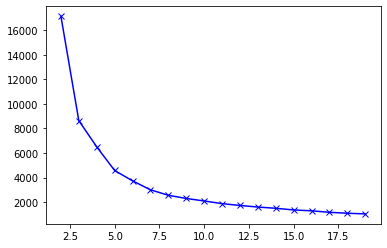

In [10]:
# Inertia vs k
plt.plot(k_range, inertia_scores, 'bx-')

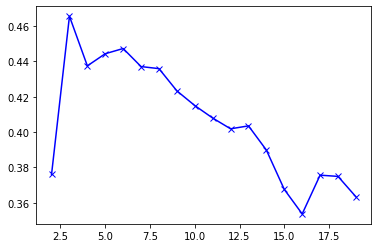

In [11]:
# Plot Silhoutte scores vs k
plt.plot(k_range, silhouette_scores, 'bx-')

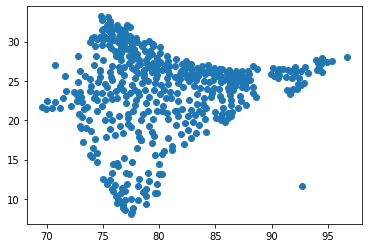

In [12]:
plt.scatter(df_geo.Long, df_geo.Lat)

In [13]:
# With 5 custers
clusterer_5 = KMeans(n_clusters=5)
clusterer_5.fit(df_geo)

KMeans(n_clusters=5)

In [14]:
preds_5 = clusterer_5.predict(df_geo)
preds_5.shape

(459,)

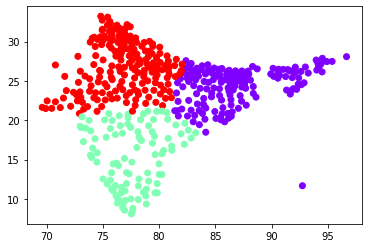

In [15]:
# With 3 clusters
clusterer_3 = KMeans(n_clusters=3)
clusterer_3.fit(df_geo)
preds_3 = clusterer_3.predict(df_geo)
plt.scatter(df_geo.Long, df_geo.Lat, c=preds_3, cmap='rainbow')

K=3 represents Northern, Southern and Eastern regions. But there are many practical differences within cluster regions such as, Rajasthan and J&K seems to represent same cluster but have totally different climate.

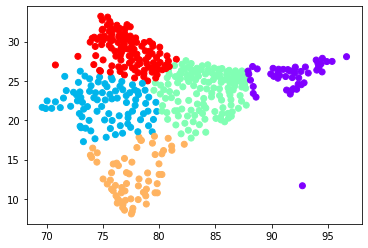

In [16]:
plt.scatter(df_geo.Long, df_geo.Lat, c=preds_5, cmap='rainbow')

K=5 represent some differences in cluster regions which can be differentiated based on extreme climate, coastal regions, etc.

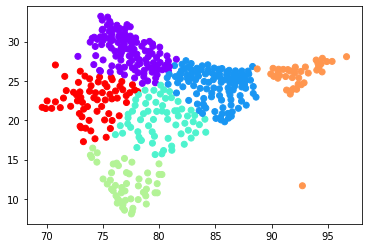

In [17]:
# With 6 clusters
clusterer_6 = KMeans(n_clusters=6)
clusterer_6.fit(df_geo)
preds_6 = clusterer_6.predict(df_geo)
plt.scatter(df_geo.Long, df_geo.Lat, c=preds_6, cmap='rainbow')

K=6 and K=5 do not represent much differences. But K=6 has higher Silhouette coefficient, hence may be considered during evaluation.

Looks like optimal number of clusters can be one of 3, 5 or 6.

In [18]:
import pickle

In [19]:
with open('./latlong_custerer_3.pkl', 'wb') as f:
        pickle.dump(clusterer_3, f)

In [20]:
with open('./latlong_custerer_5.pkl', 'wb') as f:
        pickle.dump(clusterer_5, f)

In [21]:
with open('./latlong_custerer_6.pkl', 'wb') as f:
        pickle.dump(clusterer_6, f)